Use this notebook to run experiments and plot results easily. You do not need to submit it, but you may use some of the generated plots in your report.

In [15]:
import utils
import numpy as np
from knn import KNN
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [16]:
train_df=pd.read_csv("../data/training.csv")
test_df=pd.read_csv("../data/validation.csv")

y=train_df["y"].to_numpy()
X=train_df.drop(["y"],axis=1).to_numpy()
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True,stratify=y)

y_test=test_df["y"].to_numpy()
X_test=test_df.drop(["y"],axis=1).to_numpy()

In [17]:
unique_train, counts_train = np.unique(y, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print(f"Count for {unique_train}labels  in the traning set is {counts_train}")
print(f"Count for {unique_test}labels  in the traning set is {counts_test}")
print("Thus we have a pretty balanced dataset")

Count for [0. 1.]labels  in the traning set is [1378 1422]
Count for [0. 1.]labels  in the traning set is [231 249]
Thus we have a pretty balanced dataset


In [18]:
print(np.unique(y))

[0. 1.]


In [19]:
model=KNN(40)

In [20]:
scores = cross_val_score(model, X, y, cv=5,scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.79 accuracy with a standard deviation of 0.01


When we are satisfied with the tuning of k we can test our model on the traning set but this has to be done only once to avoid data leakage

In [21]:
model.fit(X,y)
pred_test=model.predict(X_test)
acc=accuracy_score(pred_test,y_test)
print(f"testing accuracy is: {acc}")

testing accuracy is: 0.81875


You can use the routine below to plot your results. Be careful to respect the naming conventions of the variables. This means X - training inputs, y - training labels, X_test - test inputs and y_test - predicted labels

In [22]:
# Create a grid of testing points
h=.02 # space in the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
boundary = np.c_[xx.ravel(), yy.ravel()]

In [23]:
start = time.time()

pred=model.predict(boundary)

end=time.time()

print(f"Time to predict the bounadary by our custom KNN model: {end-start}")
pred=pred.reshape(xx.shape)

Time to predict the bounadary by our custom KNN model: 1.6761178970336914


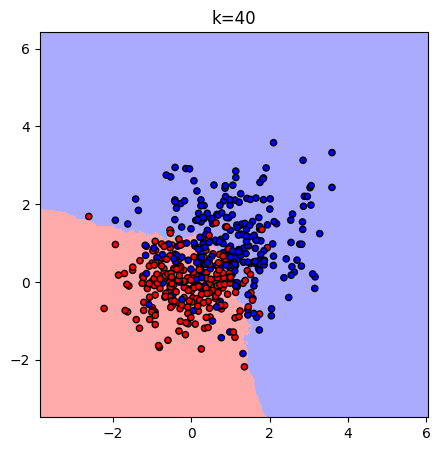

In [24]:
utils.plot_results(xx,yy,X_test,y_test,pred, "k=" + str(40))

Lets compare with sklearn's KNeighborsClassifier

In [25]:
neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=40)

In [26]:
start = time.time()

PredOptim=neigh.predict(boundary)
end=time.time()

print(f"Time to predict the boundary by Sklearn KNeighborsClassifier: {end-start}")

PredOptim=PredOptim.reshape(xx.shape)

Time to predict the boundary by Sklearn KNeighborsClassifier: 20.05816102027893


Our model performs **13 times better** on average than the base Sklearn KNN model on this particular dataset, this could be due to the overhead of some checks in the Sklearn model.

In [29]:
pred_test=neigh.predict(X_test)
acc=accuracy_score(pred_test,y_test)
print(f"testing accuracy is: {acc}")

testing accuracy is: 0.8166666666666667


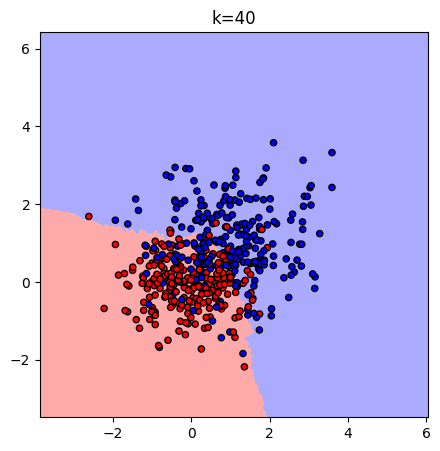

In [30]:
utils.plot_results(xx,yy,X_test,y_test,PredOptim, "k=" + str(40))

### Lets try a different dataset: Diagnostic Wisconsin Breast Cancer Database
[https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic]

In [31]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X1 = breast_cancer_wisconsin_diagnostic.data.features 
y1 = breast_cancer_wisconsin_diagnostic.data.targets 
  
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [33]:
y1=y1.replace({'M': 1, 'B': 0})

In [34]:
X1=X1.to_numpy()
y1=y1.to_numpy()

xb_train,xb_test,yb_train,yb_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

#### Our custom model

In [50]:
#model
model=KNN(5)
model.fit(xb_train,yb_train)
scores_b = cross_val_score(model, X1, y1, cv=5,scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_b.mean(), scores_b.std()))

0.93 accuracy with a standard deviation of 0.04


In [51]:
##Testing
pred=model.predict(xb_test)
pred=pred.reshape(yb_test.shape)
#accuracy
acc=accuracy_score(pred,yb_test)
print(f"testing accuracy is: {acc}")

testing accuracy is: 0.956140350877193


#### Sklearn model

In [44]:
#model
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(xb_train,yb_train.ravel())
#prediction
PredOptim=neigh.predict(xb_test)
PredOptim=PredOptim.reshape(yb_test.shape)
#accuracy
acc=accuracy_score(PredOptim,yb_test)
print(f"testing accuracy is: {acc}")

testing accuracy is: 0.956140350877193


### Part II – The curse of dimensionality:

Task 3. Suppose you have a D dimension hypercube with all sides of length 1 in the Cartesian map, i.e. [0,1]𝐷. You sample the training data uniformly from this hypercube, i.e. ∀𝑖 , 𝐱𝑖 ∈ [0,1]𝐷. Assume 𝑘=10 to define the label of a test point.
Let 𝑙 be the edge length of the smallest hypercube that contains all k-nearest neighbor of a test point. What is the approximate volume of the hypercube? What is the length of 𝑙 in terms of 𝑘, 𝐷 (the dimensions) and 𝑁 the number of training points?


#### Answer:

$V_{hypercube}=l^D$. Given that the points are uniformely distributed we can use a propotionality trick. N points correspond to volume $V=1$ thus $k$ points correcpond to volume $k/N$. Which gives:

$$l=(k/N)^{1/D} $$

Using the expression you found for 𝑙 in the previous question, estimate the size of 𝑙 as a fuction of 𝐷, while assuming a training set of size N=1000. Plot it in experiment.ipynb. What consequences this may have for the k nearest neighbor algorithm?

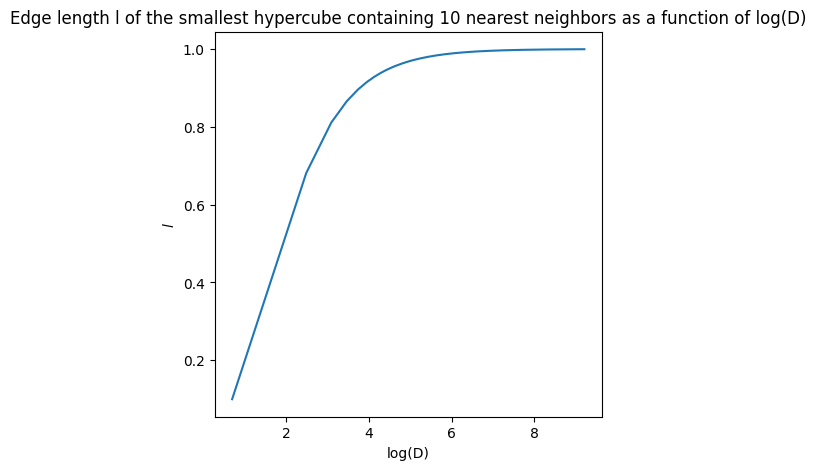

In [45]:
import seaborn as sns
D=np.arange(2,10000,10)
l_values=(10/1000)**(1/D)
sns.lineplot(x = np.log(D), y = l_values)
plt.title('Edge length l of the smallest hypercube containing 10 nearest neighbors as a function of log(D)')
plt.xlabel('log(D)')
plt.ylabel('$l$')
plt.show()

#### Answer:
As $D>>0$,   $l$ gets closer to 1. This means that smallest hypercube containing all the knn of a test point would be the unit cube itself. This implies that  the  k nearest neigbours of the test point are not really close to test point compared to the other points of the dataset , its as if they are all near the frontier of the unit hypercube, because if not then we would be able to put them in a smaller hypercube. The notion of closeness is no longuer viable here. Thus distance is meaningless in higher dimentions. So the algorithm is no longuer useful.


In other terms,  as dimension grows the notion of closeness with respect to the distance becomes meaningless. Thus the knn algorithm wouldnt be able to perform its core fucntionnality based on closeness